# Dataset construction

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

## "Most popular meme templates of 2018" exploration and analysis

Let's load the metadata table of the first and best meme dataset:

In [9]:
most_pop_df = pd.read_csv("./data/Most popular memes templates of 2018/reddit_posts.csv", usecols=["meme_id", "meme_template", "subreddit", "title", "url"])
most_pop_df

,meme_id,meme_template,subreddit,url,title
0,001i5ooagzm11_redt,that_wasnt_very_cash_money,dankmemes,https://i.redd.it/001i5ooagzm11.jpg,Mods have the i n f i n i t e gay
1,002fmrbao0z01_redt,is_this_a_pigeon,teenagers,https://i.redd.it/002fmrbao0z01.jpg,Its sad cause its true
2,007ss62yk9u11_redt,elmo_shock,dankmemes,https://i.redd.it/007ss62yk9u11.jpg,I\'m gonna say the f word
3,008bi38hvqh11_redt,stefan_pref,dankmemes,https://i.redd.it/008bi38hvqh11.png,"He taught us to respect others, even when they..."
4,00AYm2p_imgr,10_guy,AdviceAnimals,https://imgur.com/00AYm2p,I asked my roommate where all the clean dishes...
...,...,...,...,...,...
43725,zzs9f2okk8d11_redt,thor_defeat,Memes_Of_The_Dank,https://i.redd.it/zzs9f2okk8d11.jpg,Her worst enemy
43726,zzscavoq6p311_redt,socially_awesome_awkward_penguin,AdviceAnimals,https://i.redd.it/zzscavoq6p311.jpg,Didn\'t look around for even a second.
43727,zzty3zka0s611_redt,the_scroll_of_truth,bonehurtingjuice,https://i.redd.it/zzty3zka0s611.jpg,Loss are getting weirder these days
43728,zzxq4uo1bn221_redt,steve_harvey_conflicted,me_irl,https://i.redd.it/zzxq4uo1bn221.jpg,me irl


Now, let's check the subreddits distribution that could be used as labels/categories for the memes:

In [10]:
most_pop_df['subreddit'].value_counts()

AdviceAnimals            9504
dankmemes                6902
memes                    4682
me_irl                   3265
teenagers                3234
bonehurtingjuice         2674
dankchristianmemes       1559
Memes_Of_The_Dank        1278
wholesomememes           1165
PewdiepieSubmissions     1145
traaaaaaannnnnnnnnns     1122
HistoryMemes              902
PrequelMemes              665
Animemes                  592
SequelMemes               534
dank_meme                 487
DankMemesFromSite19       417
zuckmemes                 374
trebuchetmemes            331
antimeme                  279
pcmasterrace              235
lotrmemes                 225
BikiniBottomTwitter       215
OTMemes                   192
DeepFriedMemes            172
funny                     171
ComedyCemetery            170
2meirl4meirl              170
marvelmemes               155
FellowKids                147
terriblefacebookmemes     132
TooMeIrlForMeIrl          128
GarlicBreadMemes          121
Gamingcirc

Even as a seasoned redditor, I still have to check what some of these subreddits are to understand if they could be used as categories/topics. Let's make a function to show a few memes of a given subreddit.

In [11]:
from random import sample

def show_meme_sample(df:pd.DataFrame, subreddit_label:str, n:int=6):
    df_sample = df[df["subreddit"] == subreddit_label][["meme_id", "url", "title"]].sample(n)
    
    rows = int(n/3+int(bool(n%3))) # This might be stupid, but I didn't want to import numpy to compute the ceiling
    fig, axs = plt.subplots(rows, 3, figsize=(6*3, 4*rows))
    plt.tight_layout()
    
    cnt = 0
    for i in df_sample.index:
        fname = df_sample.loc[[i], ["meme_id"]].values[0][0]
        try:
            img = Image.open(f"./data/Most popular memes templates of 2018/images/kaggle_images/{fname}.jpg")
        except FileNotFoundError:
            img = Image.open(f"./data/Most popular memes templates of 2018/images/kaggle_images/{fname}.png")
        except Exception:
            print(f"file {fname} not found with extensions .jpg or .png")
        img = np.array(img)
        axs[cnt//3, cnt%3].set_xticks([])
        axs[cnt//3, cnt%3].set_yticks([])
        axs[cnt//3, cnt%3].set_title(df_sample.loc[[i], ["title"]].values[0][0], {'fontsize': 10})
        axs[cnt//3, cnt%3].imshow(img)
        cnt += 1
        
    plt.show()

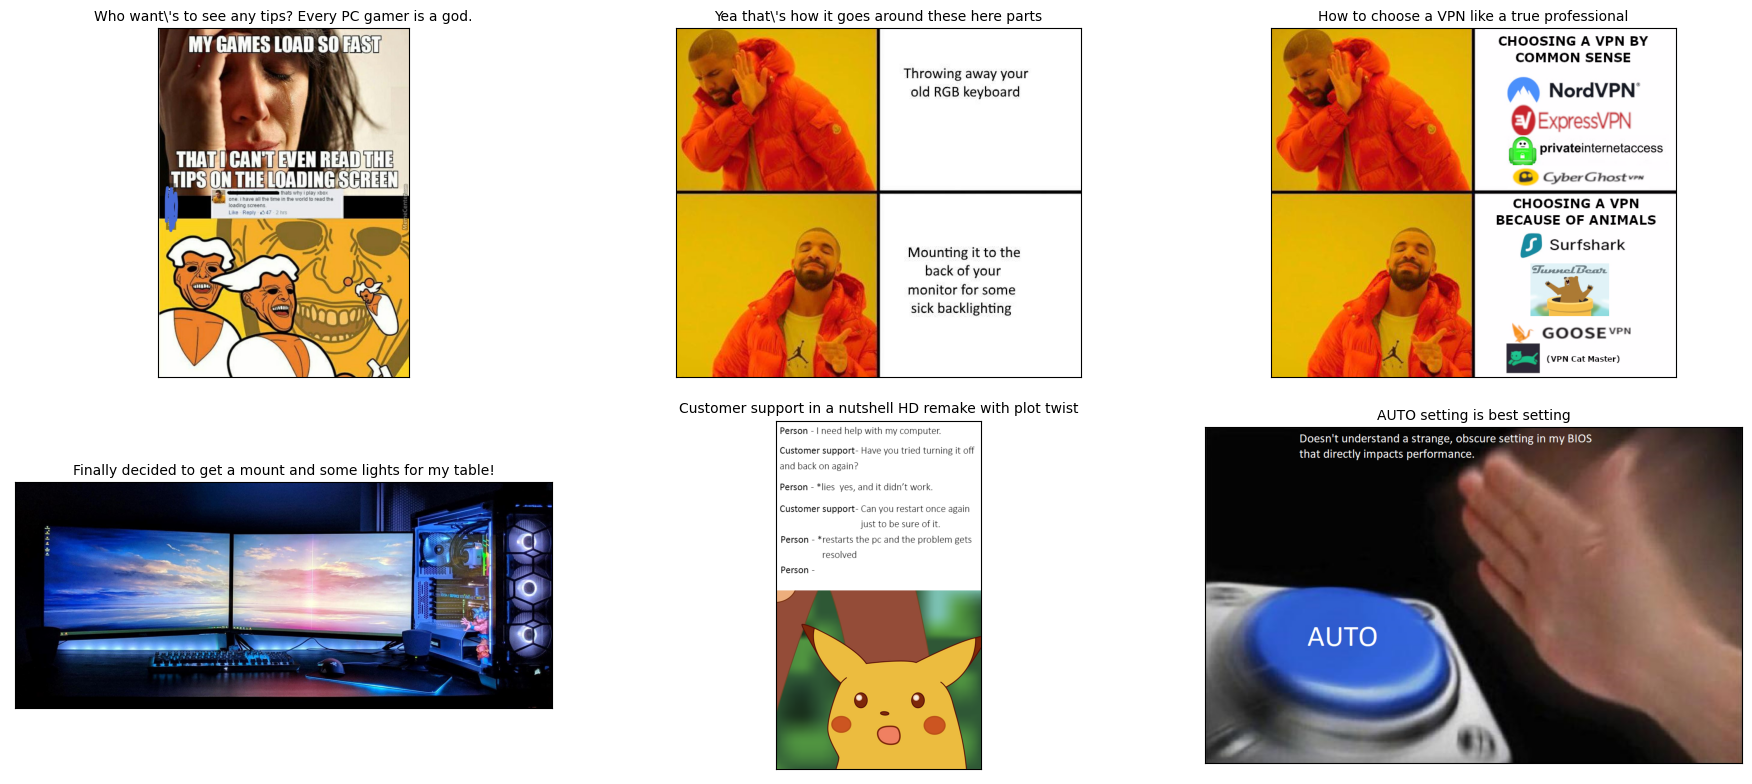

In [12]:
show_meme_sample(most_pop_df, "pcmasterrace")

Some manual findings about the subreddits:
- AdviceAnimals seems not to focus on any specific topic in particular, ranging from lifestyle to politics to other random subjects
- teenagers seems quite focused on teenagers' feelings and school, maybe it could be used as a "Youth" category
- bonehurtingjuice seems to produce dry humor style memes, not really focusing on a specific topic
- dankchristianmemes seems a perfect subreddit for a "religion" or "christianity" category
- HistoryMemes seems perfect for a "history" category
- PrequelMemes contains memes of the Star Wars prequels (maybe they could fit in a Star Wars category)
- Animemes is a subreddit with anime memes, could be used for an "Anime" category
- SequelMemes is another subreddit about Star Wars, could be used together with PrequelMemes for the "Star Wars" category
- pcmasterrace is a subreddit about PC gaming memes. It doesn't have as many entries as the subreddits above but it could potentially be used as a category ("gaming" or perhaps a more general "consumer electronics")

## Selection of rows of interest (subreddits) in the dataset

In [13]:
subreddits_to_categories = {
    "teenagers": "Youth", 
    "dankchristianmemes": "Religion", 
    "HistoryMemes": "History",
    "PrequelMemes": "Star Wars",
    "SequelMemes": "Star Wars",
    "Animemes": "Anime",
    "pcmasterrace": "Consumer Electronics",
}
df = most_pop_df.loc[most_pop_df["subreddit"].isin(subreddits_to_categories.keys())]
df

,meme_id,meme_template,subreddit,url,title
1,002fmrbao0z01_redt,is_this_a_pigeon,teenagers,https://i.redd.it/002fmrbao0z01.jpg,Its sad cause its true
5,00b0vhbrflr11_redt,drake_pref,teenagers,https://i.redd.it/00b0vhbrflr11.jpg,Just took a test so heres a midday meme
8,00d0wg7wjfm01_redt,gru_flipchart,dankchristianmemes,https://i.redd.it/00d0wg7wjfm01.png,Saul\'s logic
11,00exuutugwd11_redt,change_my_mind,teenagers,https://i.redd.it/00exuutugwd11.jpg,*recycled caption*
25,00v6mkh201521_redt,coffins,teenagers,https://i.redd.it/00v6mkh201521.jpg,Every class has one
...,...,...,...,...,...
43694,zyrkrfjj41v01_redt,i_miss_the_internet,Animemes,https://i.redd.it/zyrkrfjj41v01.png,My waifu is the only reason why i\'m alive
43698,zyuiar4o6s421_redt,domino_effect,teenagers,https://i.redd.it/zyuiar4o6s421.jpg,Basically the last century
43705,zz68n4z65lr11_redt,fallout_wtf,HistoryMemes,https://i.redd.it/zz68n4z65lr11.jpg,Excuse me
43710,zzard03whas11_redt,chuck_e_cheese_rat,HistoryMemes,https://i.redd.it/zzard03whas11.png,BuT tAkInG mOsCoW mEaNs I wIn


In [14]:
category_column = []
for sub in df["subreddit"]:
    category_column.append(subreddits_to_categories[sub])

df.insert(3, "category", category_column)
df = df.reset_index(drop=True)
df

,meme_id,meme_template,subreddit,category,url,title
0,002fmrbao0z01_redt,is_this_a_pigeon,teenagers,Youth,https://i.redd.it/002fmrbao0z01.jpg,Its sad cause its true
1,00b0vhbrflr11_redt,drake_pref,teenagers,Youth,https://i.redd.it/00b0vhbrflr11.jpg,Just took a test so heres a midday meme
2,00d0wg7wjfm01_redt,gru_flipchart,dankchristianmemes,Religion,https://i.redd.it/00d0wg7wjfm01.png,Saul\'s logic
3,00exuutugwd11_redt,change_my_mind,teenagers,Youth,https://i.redd.it/00exuutugwd11.jpg,*recycled caption*
4,00v6mkh201521_redt,coffins,teenagers,Youth,https://i.redd.it/00v6mkh201521.jpg,Every class has one
...,...,...,...,...,...,...
7716,zyrkrfjj41v01_redt,i_miss_the_internet,Animemes,Anime,https://i.redd.it/zyrkrfjj41v01.png,My waifu is the only reason why i\'m alive
7717,zyuiar4o6s421_redt,domino_effect,teenagers,Youth,https://i.redd.it/zyuiar4o6s421.jpg,Basically the last century
7718,zz68n4z65lr11_redt,fallout_wtf,HistoryMemes,History,https://i.redd.it/zz68n4z65lr11.jpg,Excuse me
7719,zzard03whas11_redt,chuck_e_cheese_rat,HistoryMemes,History,https://i.redd.it/zzard03whas11.png,BuT tAkInG mOsCoW mEaNs I wIn


## Dataset memes transcription with Tesseract

In [15]:
import ocr_text_extraction as ocr
from importlib import reload
import os
reload(ocr)

def transcribe_memes(df:pd.DataFrame):
    transcriptions = []

    for row in df.index:
        fname = df.loc[row, "meme_id"]
        base_path = "./data/Most popular memes templates of 2018/images/kaggle_images/"
        
        extensions = [".jpg", ".png", ".gif"]
        found = False
        for ext in extensions:
            path = base_path + fname + ext
            
            if os.path.isfile(path):
                found = True
                break
        
        if not found:
            print(f"file {fname} not found with extensions .jpg .png or .gif")
            transcriptions.append("?")
        else:        
            try:
                transcriptions.append(ocr.extract_text_wprocessing(path))
            except Exception:
                print(f"Something wrong with row {row}")
                transcriptions.append("?")
        
        # Print progress
        print(f"Processing... [{row}/{df.shape[0]}]", end='\r')

    df.insert(4, "transcription", transcriptions)
    # df["transcription"] = transcriptions
    df.to_csv("./data/working_dataset.csv")
    return df

df

,meme_id,meme_template,subreddit,category,url,title
0,002fmrbao0z01_redt,is_this_a_pigeon,teenagers,Youth,https://i.redd.it/002fmrbao0z01.jpg,Its sad cause its true
1,00b0vhbrflr11_redt,drake_pref,teenagers,Youth,https://i.redd.it/00b0vhbrflr11.jpg,Just took a test so heres a midday meme
2,00d0wg7wjfm01_redt,gru_flipchart,dankchristianmemes,Religion,https://i.redd.it/00d0wg7wjfm01.png,Saul\'s logic
3,00exuutugwd11_redt,change_my_mind,teenagers,Youth,https://i.redd.it/00exuutugwd11.jpg,*recycled caption*
4,00v6mkh201521_redt,coffins,teenagers,Youth,https://i.redd.it/00v6mkh201521.jpg,Every class has one
...,...,...,...,...,...,...
7716,zyrkrfjj41v01_redt,i_miss_the_internet,Animemes,Anime,https://i.redd.it/zyrkrfjj41v01.png,My waifu is the only reason why i\'m alive
7717,zyuiar4o6s421_redt,domino_effect,teenagers,Youth,https://i.redd.it/zyuiar4o6s421.jpg,Basically the last century
7718,zz68n4z65lr11_redt,fallout_wtf,HistoryMemes,History,https://i.redd.it/zz68n4z65lr11.jpg,Excuse me
7719,zzard03whas11_redt,chuck_e_cheese_rat,HistoryMemes,History,https://i.redd.it/zzard03whas11.png,BuT tAkInG mOsCoW mEaNs I wIn


## Dataset quality analysis and cleaning

In [33]:
df = pd.read_csv("./data/working_dataset.csv", index_col=0)

The transcriptions are by far not perfect: Tesseract has a lot of trouble recognizing text that is positioned at different angles, as well as text in different colors and with different backgrounds. Moreover, if two groups of text (e.g. speech bubbles) are adjacent to each other, Tesseract will connect each line of the two groups together, breaking the syntax in comic-like memes. 

I also noticed that the method I wrote for selecting the best transcription for each meme, i.e. selecting the one with the lower percentage of error, may be flawed: The transcription might in fact find a few random combination of letters without any meaning but "correct", as they are found in the dictionary, and ditch the second transcription with meaningful words but more mistaken words as well. After manually analyzing a small sample of bad transcriptions, it seems that the problem is mostly in the preprocessing of the image and/or the OCR, as some meme templates are just very hard for a program to recognize and read text from (examples in report).

Some transcriptions are also bad because the source image quality is low, perhaps requiring more aggressive denoising to avoid that graphic artifacts are picked up as random letters. Also, some images' aspect ratio was damaged, making the picture squished and unreadable even for a human.

One solution to all these issues would be to only use meme templates that are well readable by the OCR. This solution might not work, because during the manual analysis I noticed instances of a particular meme template sometimes resulting in a garbage transcription, sometimes in a perfect one. Another idea could be to set a base threshold of correctness in the transcription evaluation step, maybe normalized by the number of words. 

Since many of the sentences are broken, I decided to ditch the syntax altogether and train the model on the word sets rather than sequences, basing the prediction on recurring words used in the context of a subreddit/topic. It could also be worth trying to use the title of the post as additional data for the model.

Before this, let's normalize and tokenize the transcriptions. I will keep empty transcriptions for now, as the titles of the post could be used for the training instead.

Note: I decided not to automatically remove "wrong" words from the transcriptions, as many slang and pop culture words important for the classification may be lost as well.

In [34]:
# Idea: remove rows in which the transcription has average word length < threshold, with threshold maybe = 3

bad_rows = []
avg_word_thresh = 3

for row in df.index:
    word_list = df.loc[row, "transcription"]
    
    if not word_list or type(word_list) != str:
        bad_rows.append(row)
    
    else:
        word_list = word_list.split(" ")
        avg_len = sum(map(len, word_list)) / len(word_list)
        if avg_len < avg_word_thresh:
            bad_rows.append(row)


In [35]:
bad_df = df.iloc[bad_rows, :]
bad_df
# It's nearly 1/3 of the rows, sadly :(

,meme_id,meme_template,subreddit,category,url,transcription,title
3,00exuutugwd11_redt,change_my_mind,teenagers,Youth,https://i.redd.it/00exuutugwd11.jpg,et Toc uss ooycny CARRY ANY ua Mf A a Ca core i,*recycled caption*
8,01je5rveg9721_redt,double_d_fact_book,HistoryMemes,History,https://i.redd.it/01je5rveg9721.jpg,it a a All Say the ecg N. ad Cam Us e th Wo rd...,All humans can say the n word
10,01y3onu0ipn11_redt,who_would_win,HistoryMemes,History,https://i.redd.it/01y3onu0ipn11.jpg,dem ele ZI. ed og Ci Re,That\'s an easy one
11,01ypikrvldj11_redt,fallout_wtf,Animemes,Anime,https://i.redd.it/01ypikrvldj11.jpg,fe rae YOUR Ree red beast a eae S Labia Salah ...,"oh shit guys abandon, abandon."
14,024sb686ci321_redt,domino_effect,HistoryMemes,History,https://i.redd.it/024sb686ci321.png,I,What caused WWII
...,...,...,...,...,...,...,...
7699,zvw3xrastrt01_redt,who_killed_hannibal,SequelMemes,Star Wars,https://i.redd.it/zvw3xrastrt01.jpg,At cee aSo ee,Long live Supreme Leader
7704,zwcddcm7kht01_redt,who_killed_hannibal,teenagers,Youth,https://i.redd.it/zwcddcm7kht01.jpg,NaN,Why am I like this?
7710,zxt44burmac11_redt,distracted_boyfriend,teenagers,Youth,https://i.redd.it/zxt44burmac11.jpg,Le i wo,Yup
7713,zya3p40e5j221_redt,this_is_brilliant_but_i_like_this,teenagers,Youth,https://i.redd.it/zya3p40e5j221.jpg,re ie i. ve r a udy Sot sae mera rela iE Tau n...,Am I the only one who does this?


Let's see the most offending meme templates

In [36]:
bad_templates = bad_df.value_counts("meme_template")
print(bad_templates)

meme_template
drake_pref                  205
change_my_mind              121
distracted_boyfriend        112
is_this_a_pigeon             89
hard_to_swallow_pills        84
                           ... 
levels_hell                   1
level_stress_99               1
toad_property                 1
improvise_adapt_overcome      1
agree_husband                 1
Length: 198, dtype: int64


Example of a bad meme template ("Change my mind" template)

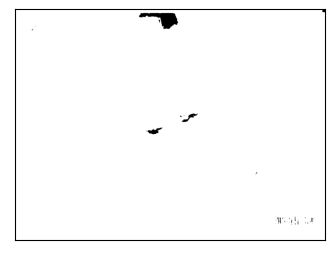

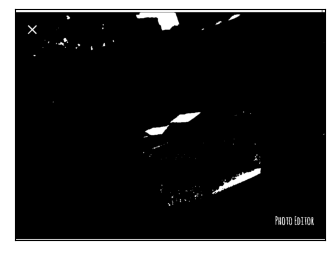

transcription candidates:
['Wed', 't']
['UA']



'UA'

In [37]:
base_path = "./data/Most popular memes templates of 2018/images/kaggle_images/"
ocr.extract_text_wprocessing(base_path+"0b89397qkrg11_redt.jpg", print_processed_img=True, debug=True)

Apparently, the worst meme templates to OCR (at least with Tesseract) are for example "Drake preference", "change my mind" and "distracted boyfriend". Some of these templates are too low quality, which could potentially be fixed with more aggressive pre-processing of the image, while others have text over differently colored backgrounds which makes it very hard for a program to read.

Since most of the transcriptions are garbage, I have to remove them from the dataset. I can keep this bad dataset on the side for a potential prediction model trained on the title of the post rather than the content of the meme.

In [38]:
df = df.drop(bad_rows)
df = df.reset_index(drop=True)
df

,meme_id,meme_template,subreddit,category,url,transcription,title
0,002fmrbao0z01_redt,is_this_a_pigeon,teenagers,Youth,https://i.redd.it/002fmrbao0z01.jpg,Angry teenagers Adults caused by gaming?,Its sad cause its true
1,00b0vhbrflr11_redt,drake_pref,teenagers,Youth,https://i.redd.it/00b0vhbrflr11.jpg,Being the first person to turn a test in Waiti...,Just took a test so heres a midday meme
2,00d0wg7wjfm01_redt,gru_flipchart,dankchristianmemes,Religion,https://i.redd.it/00d0wg7wjfm01.png,Find the Kill the Christians Christians Become...,Saul\'s logic
3,00v6mkh201521_redt,coffins,teenagers,Youth,https://i.redd.it/00v6mkh201521.jpg,Good students Bad students ae ry erent who Mee...,Every class has one
4,00y1egunhqw11_redt,netflix_adaptation,teenagers,Youth,https://i.redd.it/00y1egunhqw11.jpg,Manga Anime Netflix Adaptation,We got suspended for this
...,...,...,...,...,...,...,...
5425,zyq5c4gji1f11_redt,my_heart,teenagers,Youth,https://i.redd.it/zyq5c4gji1f11.jpg,MY HEART Walking Running When You Realise You ...,"A meme my friend made, felt like it relates to..."
5426,zyrkrfjj41v01_redt,i_miss_the_internet,Animemes,Anime,https://i.redd.it/zyrkrfjj41v01.png,a a a aa A GOODBEARCOMICS. com,My waifu is the only reason why i\'m alive
5427,zyuiar4o6s421_redt,domino_effect,teenagers,Youth,https://i.redd.it/zyuiar4o6s421.jpg,regi Causing fu Ho ocaust an cling bursa cold ...,Basically the last century
5428,zz68n4z65lr11_redt,fallout_wtf,HistoryMemes,History,https://i.redd.it/zz68n4z65lr11.jpg,Romans create the cross to inflict a painful d...,Excuse me


## Transcriptions normalization and tokenization

These transcriptions look way better. Now, we can finally normalize and tokenize them.

In [39]:
# From remove-emoji.py, source: https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b#file-remove-emoji-py

import re
import sys

# https://stackoverflow.com/a/49146722/330558
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [40]:
normalized_transcriptions = [remove_emoji(string) for string in df["transcription"]]
df["transcription"] = normalized_transcriptions

In [41]:
from sacremoses import MosesTokenizer

mt = MosesTokenizer(lang='en')
tokens = [mt.tokenize(string) for string in df["transcription"]]
df.insert(7, "tokenized_transcription", tokens)
df

,meme_id,meme_template,subreddit,category,url,transcription,title,tokenized_transcription
0,002fmrbao0z01_redt,is_this_a_pigeon,teenagers,Youth,https://i.redd.it/002fmrbao0z01.jpg,Angry teenagers Adults caused by gaming?,Its sad cause its true,"[Angry, teenagers, Adults, caused, by, gaming, ?]"
1,00b0vhbrflr11_redt,drake_pref,teenagers,Youth,https://i.redd.it/00b0vhbrflr11.jpg,Being the first person to turn a test in Waiti...,Just took a test so heres a midday meme,"[Being, the, first, person, to, turn, a, test,..."
2,00d0wg7wjfm01_redt,gru_flipchart,dankchristianmemes,Religion,https://i.redd.it/00d0wg7wjfm01.png,Find the Kill the Christians Christians Become...,Saul\'s logic,"[Find, the, Kill, the, Christians, Christians,..."
3,00v6mkh201521_redt,coffins,teenagers,Youth,https://i.redd.it/00v6mkh201521.jpg,Good students Bad students ae ry erent who Mee...,Every class has one,"[Good, students, Bad, students, ae, ry, erent,..."
4,00y1egunhqw11_redt,netflix_adaptation,teenagers,Youth,https://i.redd.it/00y1egunhqw11.jpg,Manga Anime Netflix Adaptation,We got suspended for this,"[Manga, Anime, Netflix, Adaptation]"
...,...,...,...,...,...,...,...,...
5425,zyq5c4gji1f11_redt,my_heart,teenagers,Youth,https://i.redd.it/zyq5c4gji1f11.jpg,MY HEART Walking Running When You Realise You ...,"A meme my friend made, felt like it relates to...","[MY, HEART, Walking, Running, When, You, Reali..."
5426,zyrkrfjj41v01_redt,i_miss_the_internet,Animemes,Anime,https://i.redd.it/zyrkrfjj41v01.png,a a a aa A GOODBEARCOMICS. com,My waifu is the only reason why i\'m alive,"[a, a, a, aa, A, GOODBEARCOMICS., com]"
5427,zyuiar4o6s421_redt,domino_effect,teenagers,Youth,https://i.redd.it/zyuiar4o6s421.jpg,regi Causing fu Ho ocaust an cling bursa cold ...,Basically the last century,"[regi, Causing, fu, Ho, ocaust, an, cling, bur..."
5428,zz68n4z65lr11_redt,fallout_wtf,HistoryMemes,History,https://i.redd.it/zz68n4z65lr11.jpg,Romans create the cross to inflict a painful d...,Excuse me,"[Romans, create, the, cross, to, inflict, a, p..."


Let's do the same for the post titles, just in case.

In [42]:
normalized_titles = [remove_emoji(string) for string in df["title"]]
tokens = [mt.tokenize(string) for string in normalized_titles]

df.insert(8, "tokenized_title", tokens)
df

,meme_id,meme_template,subreddit,category,url,transcription,title,tokenized_transcription,tokenized_title
0,002fmrbao0z01_redt,is_this_a_pigeon,teenagers,Youth,https://i.redd.it/002fmrbao0z01.jpg,Angry teenagers Adults caused by gaming?,Its sad cause its true,"[Angry, teenagers, Adults, caused, by, gaming, ?]","[It, , s, sad, , cause, it, , s, true]"
1,00b0vhbrflr11_redt,drake_pref,teenagers,Youth,https://i.redd.it/00b0vhbrflr11.jpg,Being the first person to turn a test in Waiti...,Just took a test so heres a midday meme,"[Being, the, first, person, to, turn, a, test,...","[Just, took, a, test, so, here, , s, a, midda..."
2,00d0wg7wjfm01_redt,gru_flipchart,dankchristianmemes,Religion,https://i.redd.it/00d0wg7wjfm01.png,Find the Kill the Christians Christians Become...,Saul\'s logic,"[Find, the, Kill, the, Christians, Christians,...","[Saul, \, &apos;, s, logic]"
3,00v6mkh201521_redt,coffins,teenagers,Youth,https://i.redd.it/00v6mkh201521.jpg,Good students Bad students ae ry erent who Mee...,Every class has one,"[Good, students, Bad, students, ae, ry, erent,...","[Every, class, has, one]"
4,00y1egunhqw11_redt,netflix_adaptation,teenagers,Youth,https://i.redd.it/00y1egunhqw11.jpg,Manga Anime Netflix Adaptation,We got suspended for this,"[Manga, Anime, Netflix, Adaptation]","[We, got, suspended, for, this]"
...,...,...,...,...,...,...,...,...,...
5425,zyq5c4gji1f11_redt,my_heart,teenagers,Youth,https://i.redd.it/zyq5c4gji1f11.jpg,MY HEART Walking Running When You Realise You ...,"A meme my friend made, felt like it relates to...","[MY, HEART, Walking, Running, When, You, Reali...","[A, meme, my, friend, made, ,, felt, like, it,..."
5426,zyrkrfjj41v01_redt,i_miss_the_internet,Animemes,Anime,https://i.redd.it/zyrkrfjj41v01.png,a a a aa A GOODBEARCOMICS. com,My waifu is the only reason why i\'m alive,"[a, a, a, aa, A, GOODBEARCOMICS., com]","[My, waifu, is, the, only, reason, why, i, \, ..."
5427,zyuiar4o6s421_redt,domino_effect,teenagers,Youth,https://i.redd.it/zyuiar4o6s421.jpg,regi Causing fu Ho ocaust an cling bursa cold ...,Basically the last century,"[regi, Causing, fu, Ho, ocaust, an, cling, bur...","[Basically, the, last, century]"
5428,zz68n4z65lr11_redt,fallout_wtf,HistoryMemes,History,https://i.redd.it/zz68n4z65lr11.jpg,Romans create the cross to inflict a painful d...,Excuse me,"[Romans, create, the, cross, to, inflict, a, p...","[Excuse, me]"


Now, let's make an additional column with tokenized transcription + title together:

In [43]:
merged_title_and_content_tokens = [mt.tokenize(string) for string in df["transcription"] + " " + df["title"]]

In [46]:
df.insert(df.shape[1], "tokenized_merged_transc_title", merged_title_and_content_tokens)
df

,meme_id,meme_template,subreddit,category,url,transcription,title,tokenized_transcription,tokenized_title,tokenized_merged_transc_title
0,002fmrbao0z01_redt,is_this_a_pigeon,teenagers,Youth,https://i.redd.it/002fmrbao0z01.jpg,Angry teenagers Adults caused by gaming?,Its sad cause its true,"[Angry, teenagers, Adults, caused, by, gaming, ?]","[It, , s, sad, , cause, it, , s, true]","[Angry, teenagers, Adults, caused, by, gaming,..."
1,00b0vhbrflr11_redt,drake_pref,teenagers,Youth,https://i.redd.it/00b0vhbrflr11.jpg,Being the first person to turn a test in Waiti...,Just took a test so heres a midday meme,"[Being, the, first, person, to, turn, a, test,...","[Just, took, a, test, so, here, , s, a, midda...","[Being, the, first, person, to, turn, a, test,..."
2,00d0wg7wjfm01_redt,gru_flipchart,dankchristianmemes,Religion,https://i.redd.it/00d0wg7wjfm01.png,Find the Kill the Christians Christians Become...,Saul\'s logic,"[Find, the, Kill, the, Christians, Christians,...","[Saul, \, &apos;, s, logic]","[Find, the, Kill, the, Christians, Christians,..."
3,00v6mkh201521_redt,coffins,teenagers,Youth,https://i.redd.it/00v6mkh201521.jpg,Good students Bad students ae ry erent who Mee...,Every class has one,"[Good, students, Bad, students, ae, ry, erent,...","[Every, class, has, one]","[Good, students, Bad, students, ae, ry, erent,..."
4,00y1egunhqw11_redt,netflix_adaptation,teenagers,Youth,https://i.redd.it/00y1egunhqw11.jpg,Manga Anime Netflix Adaptation,We got suspended for this,"[Manga, Anime, Netflix, Adaptation]","[We, got, suspended, for, this]","[Manga, Anime, Netflix, Adaptation, We, got, s..."
...,...,...,...,...,...,...,...,...,...,...
5425,zyq5c4gji1f11_redt,my_heart,teenagers,Youth,https://i.redd.it/zyq5c4gji1f11.jpg,MY HEART Walking Running When You Realise You ...,"A meme my friend made, felt like it relates to...","[MY, HEART, Walking, Running, When, You, Reali...","[A, meme, my, friend, made, ,, felt, like, it,...","[MY, HEART, Walking, Running, When, You, Reali..."
5426,zyrkrfjj41v01_redt,i_miss_the_internet,Animemes,Anime,https://i.redd.it/zyrkrfjj41v01.png,a a a aa A GOODBEARCOMICS. com,My waifu is the only reason why i\'m alive,"[a, a, a, aa, A, GOODBEARCOMICS., com]","[My, waifu, is, the, only, reason, why, i, \, ...","[a, a, a, aa, A, GOODBEARCOMICS., com, My, wai..."
5427,zyuiar4o6s421_redt,domino_effect,teenagers,Youth,https://i.redd.it/zyuiar4o6s421.jpg,regi Causing fu Ho ocaust an cling bursa cold ...,Basically the last century,"[regi, Causing, fu, Ho, ocaust, an, cling, bur...","[Basically, the, last, century]","[regi, Causing, fu, Ho, ocaust, an, cling, bur..."
5428,zz68n4z65lr11_redt,fallout_wtf,HistoryMemes,History,https://i.redd.it/zz68n4z65lr11.jpg,Romans create the cross to inflict a painful d...,Excuse me,"[Romans, create, the, cross, to, inflict, a, p...","[Excuse, me]","[Romans, create, the, cross, to, inflict, a, p..."


Finally, let's save our precious dataset.

In [47]:
df.to_csv("./data/final_dataset.csv")